In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline

In [2]:
# 1. Summarize
raw_data = {
'job': """ Bán hàng (1,456)IT - Phần mềm (1,171)Tài chính/Đầu tư (1,041) Marketing (970) Hành chánh/Thư ký (898) IT-Phần cứng/Mạng (863)Internet/Online Media (789)Dịch vụ khách hàng (781) Kế toán (763) Sản Xuất (760) Xây dựng (757) Điện/Điện tử (746) Cơ khí (626) Nhân sự (568) Kiểm toán (563) Ngân hàng (549) Bán hàng kỹ thuật (477) Quảng cáo/Khuyến mãi/Đối ngoại (471) Biên phiên dịch (451) Cấp quản lý điều hành (435) """,

'location': """Hồ Chí Minh (4,133) Hà Nội (3,616) Bình Dương (324) Đà Nẵng (321) Bắc Ninh (266) Đồng Nai (263) Hưng Yên (236) Hải Phòng (224) Hải Dương (203) Biên Hòa (162) Hà Nam (101) Quốc tế (97) Long An (81) Bà Rịa - Vũng Tàu (80) Bắc Giang (72) Vĩnh Phúc (56) Khánh Hòa (48) Cần Thơ (47) Quảng Nam (43) Quảng Ninh (43)""",
# skills    
'skill': """English (353) Sales (326) Kinh Doanh (242) Marketing (224) Tiếng Anh (183) Customer Service (176) Bán Hàng (164) English - Good (148) Xây Dựng (145) Tài Chính (139) Ke Toan (134) English - Fluent (126) Java (123) Autocad (122) Japanese Beginner (122) Chăm Sóc Khách Hàng (98) PHP (89) Tiếng Nhật Sơ Cấp (84) Quản Lý - Điều Hành (77) Ngân Hàng (76)""",
# positions    
'position': """Nhân viên (6,059) Trưởng Phòng (1,586) Mới Tốt Nghiệp (516) Giám Đốc và Cấp Cao Hơn (270)""",
# who    
'who': """Navigos Search’s Client (331) Navigos Search (108) VPBank - Https://tuyendung.vpbank.com.vn/ (46) Ngân Hàng TMCP Xăng Dầu Petrolimex (PGBank) (33) Prudential Vietnam Assurance (33) VietnamWorks (27) ASWIG Solutions (25) Gameloft (24) Ngân Hàng TMCP Quốc Tế Việt Nam (VIB) (24) BIM GROUP (22) Công Ty Sản Xuất Của Nhật (22) Công Ty Cổ Phần Tập Đoàn BRG (21) HSBC Vietnam (20) Robert Bosch Engineering Vietnam (20) Tổ Hợp Công Nghệ Giáo Dục Topica (18) Vietnamworks' Client (17) AIA Vietnam (16) RMIT University Vietnam (16) Công Ty Cổ Phần Đầu Tư Và Phát Triển Đô Thị Việt Hưng (VIHAJICO) (15) Heineken Hanoi Brewery Company LTD. (15)"""
}

In [3]:
def raw_data_to_df(k, value):
    mo = re.findall('(.*?)[\s]*(\([\d,]*\))', value)
    data = [[] for _ in range(2)]
    for title, count in mo:
        title = title.strip()
        count = int(re.sub("\D", "", count))
        data[0].append(title)
        data[1].append(count)
    df = pd.DataFrame(data).T
    df.columns = [k, '{}_count'.format(k)]    
    return df

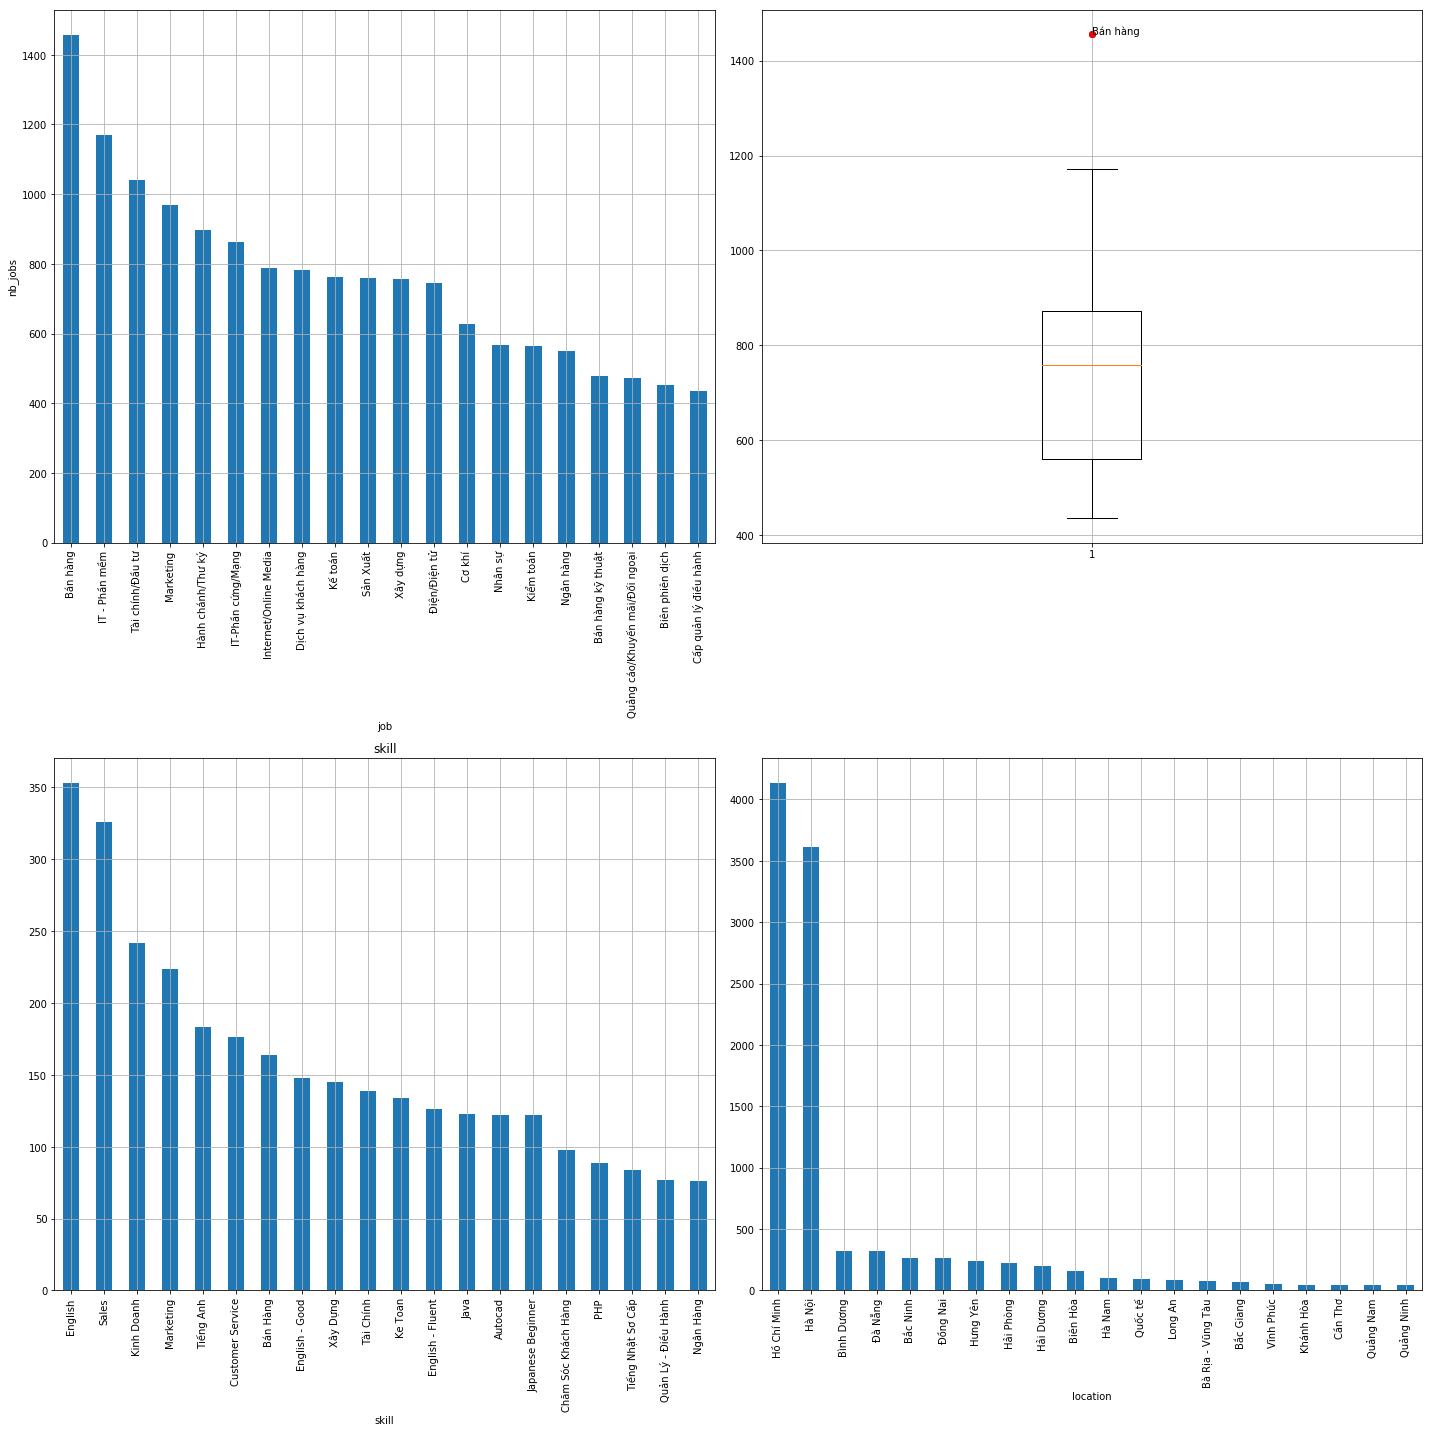

In [4]:
k = 'job'
df = raw_data_to_df(k, raw_data[k])

# bar chart
fig = plt.figure()
ax = fig.add_subplot(221)
df.set_index(['job'])['job_count'].plot.bar(ax=ax, grid=True,rot=90)
ax.set_ylabel('nb_jobs')

# boxplot and outlier
ax = fig.add_subplot(222)
r = ax.boxplot(df.job_count.values)
#outlier
q75, q25 = np.percentile(df.job_count, [75 ,25])
iqr = q75 - q25

for i, r in df[(df.job_count > (q75+1.5*iqr)) | (df.job_count < (q25-1.5*iqr))].iterrows():
    ax.text(1, r['job_count'], r['job'].decode('utf-8'))    
    ax.plot(1, r['job_count'], 'ro')
ax.grid()

# location
df = raw_data_to_df('skill', raw_data['skill'])
ax = fig.add_subplot(2, 2, 3)
df.set_index('skill')['skill_count'].plot.bar(ax=ax)
ax.set_title('skill')
ax.grid(True)

#skill
df = raw_data_to_df('location', raw_data['location'])
ax = fig.add_subplot(2, 2, 4)
df.set_index('location')['location_count'].plot.bar(ax=ax)
ax.grid(True)

fig.set_size_inches(20, 20)
fig.tight_layout()
fig.savefig('job_statistic.png')


High demand jobs: Sale, IT
High demand skills: English, Sale, marketing
High demand locations: Hanoi (North), HoChiMinh, Binh Duong (South), Danang (Middle)

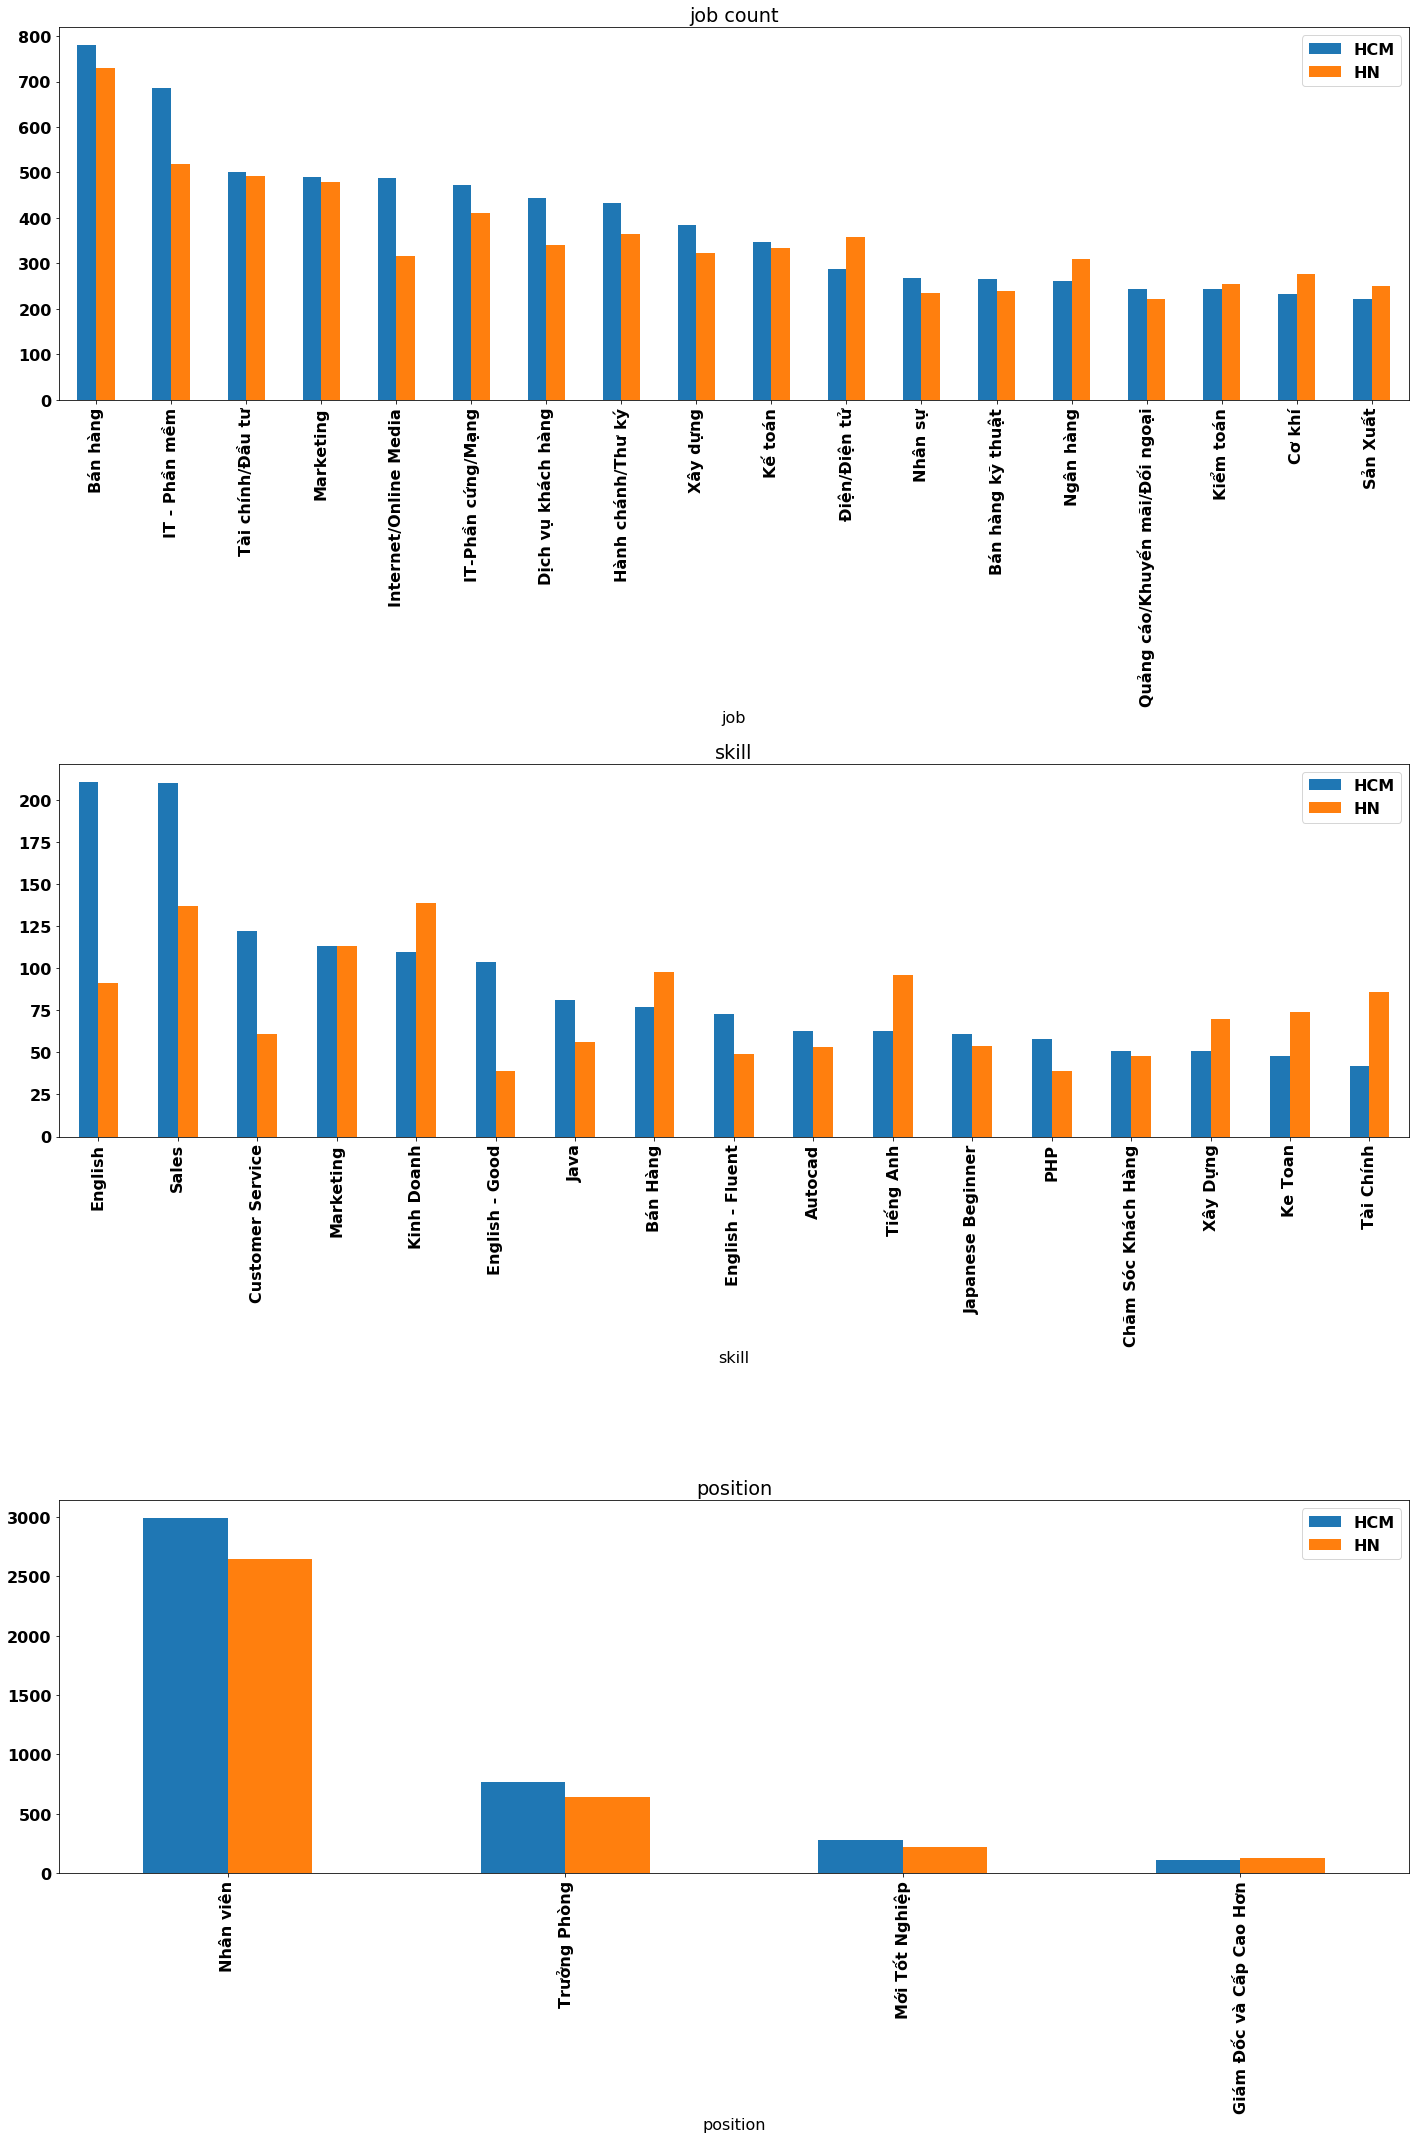

In [19]:
# HCM data
plt.rcParams['font.size']= '16'
HCM_data = {
    'job': """Bán hàng (780) IT - Phần mềm (685) Tài chính/Đầu tư (501) Marketing (490) Internet/Online Media (488) IT-Phần cứng/Mạng (472) Dịch vụ khách hàng (443) Hành chánh/Thư ký (432) Xây dựng (385) Kế toán (348) Điện/Điện tử (288) Nhân sự (268) Bán hàng kỹ thuật (265) Ngân hàng (261) Quảng cáo/Khuyến mãi/Đối ngoại (245) Kiểm toán (245) Kiến trúc/Thiết kế nội thất (239) Cơ khí (232) Sản Xuất (223) Giáo dục/Đào tạo (216)""",
    'skill': """English (211) Sales (210) Customer Service (122) Marketing (113) Kinh Doanh (110) English - Good (104) Java (81) Bán Hàng (77) English - Fluent (73) Autocad (63) Tiếng Anh (63) Japanese Beginner (61) PHP (58) Project Management (52) Chăm Sóc Khách Hàng (51) Xây Dựng (51) Ke Toan (48) Javascript (45) .Net (43) Tài Chính (42)""",
    'position': """Nhân viên (2,991) Trưởng Phòng (767) Mới Tốt Nghiệp (280) Giám Đốc và Cấp Cao Hơn (113)"""
}
HN_data = {
    'job': """Bán hàng (730) IT - Phần mềm (519) Tài chính/Đầu tư (493) Marketing (480) IT-Phần cứng/Mạng (410) Hành chánh/Thư ký (364) Điện/Điện tử (359) Dịch vụ khách hàng (341) Kế toán (335) Xây dựng (324) Internet/Online Media (316) Ngân hàng (310) Cơ khí (278) Kiểm toán (256) Sản Xuất (250) Bán hàng kỹ thuật (240) Nhân sự (236) Quảng cáo/Khuyến mãi/Đối ngoại (222) Cấp quản lý điều hành (196) Biên phiên dịch (193)""",
    'skill': """Kinh Doanh (139) Sales (137) Marketing (113) Bán Hàng (98) Tiếng Anh (96) English (91) Tài Chính (86) Ke Toan (74) Xây Dựng (70) Customer Service (61) Java (56) Japanese Beginner (54) Autocad (53) Ngân Hàng (50) English - Fluent (49) Chăm Sóc Khách Hàng (48) Tiếng Nhật Sơ Cấp (44) Quản Lý - Điều Hành (43) English - Good (39) PHP (39)""",
    'position': """Nhân viên (2,651) Trưởng Phòng (644) Mới Tốt Nghiệp (218) Giám Đốc và Cấp Cao Hơn (131)"""
}

hcm_job_df = raw_data_to_df('job', HCM_data['job'])
hn_job_df = raw_data_to_df('job', HN_data['job'])


fig = plt.figure()

ax = fig.add_subplot(311)
df = pd.merge(hcm_job_df, hn_job_df, left_on='job', right_on='job')
df = df.set_index(['job'])
df.columns = ['HCM', 'HN']
df.plot.bar(ax=ax)
ax.set_title('job count')

ax = fig.add_subplot(312)
hcm_skill_df = raw_data_to_df('skill', HCM_data['skill'])
hn_skill_df = raw_data_to_df('skill', HN_data['skill'])

df = pd.merge(hcm_skill_df, hn_skill_df, left_on='skill', right_on='skill')
df = df.set_index(['skill'])
df.columns = ['HCM', 'HN']
df.plot.bar(ax=ax)
ax.set_title('skill')

ax = fig.add_subplot(313)
hcm_skill_df = raw_data_to_df('position', HCM_data['position'])
hn_skill_df = raw_data_to_df('position', HN_data['position'])

df = pd.merge(hcm_skill_df, hn_skill_df, left_on='position', right_on='position')
df = df.set_index(['position'])
df.columns = ['HCM', 'HN']
df.plot.bar(ax=ax)
ax.set_title('position')

fig.set_size_inches(20, 30)
fig.tight_layout()
fig.savefig('HN_SG.png')